# Topic 39+: Deeper NLP

1. Word vectors
    - Word vectors with Gensim
    - Word vectors with SpaCy
2. Topic Modeling

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

import gensim.downloader as api
from gensim.test.utils import datapath
from gensim.models import KeyedVectors

# Word Embedding

Embedding vectors are very different than the TF-IDF or Count Vectors we learned about previously.  TF-IDF and Count Vectors contain only information about the quantity of each word in a document, but nothing about the words' meanings.  

Embedding vectors capture the semantic meaning of words.  Think about that for second.  How can you turn the MEANING of a work into a vector of numbers?

Count the TF-IDF transforms a document into a sparse vector similar to a one-hot encoding (but with values not limited to 0 and 1).  Embedding vectors transform each word (there are ways to transform a sentence or document into one vector, but we'll talk about that later) into a vector in an arbitrarily high dimensional vector space.  In this case the vector is not sparse, but describes the position of the word in each dimension in that space.  This just like how (.5, .3, .7) would describe the position of a point in 3 dimensional space (x, y, z). Word vector spaces can have 50, 100, 500, or more dimensions.

**What does a dimension represent?** 

A dimension in this space represents a relationship between words.  For instance, dimension x may represent gender, and dimension y may represent social status.  

**How are these vectors determined?** 

Embeddings are learned by an unsupervised model, somewhat like PCA.  The model trains on a corpus to determine how words are related to each other in the texts.

The embeddings can be learned from your corpus of documents through models like Word2Vec or can be downloaded from pretrained embedding models.


**Bias Alert**

The dimensions in an embedding model can and do represent bias inherent in language.  Dimensions can represent semantic relationships such as race, gender, ability, sexuality, etc.  'Doctor' and 'Custodian' may occupy different positions along a racial or gender dimension!  There are ways to reduce this bias by collapsing a dimension and projecting it onto a lower dimensional space.  A math heavy and comprehensive paper released by Stanford researchers is available [Here](http://cs229.stanford.edu/proj2016/report/BadieChakrabortyRudder-ReducingGenderBiasInWordEmbeddings-report.pdf)

If you want to test bias in your embedding model, try an analogy like: "'man' is to 'doctor' as woman is to 'X'". You'll learn below how to ask your model to complete these analogies.

### Gensim Documentation

* Pretrained vectors: https://github.com/RaRe-Technologies/gensim-data
* Vector methods: https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.Word2VecKeyedVectors.load_word2vec_format

**GloVe Vectors**

GloVe vectors are a set of word embedding models pre-trained at Stanford and available for free.  There is a collection of different models available.  The one we use below projects words into a 100 dimensional space and is trained on the full corpus of Wikipedia plus a the Gigaword 5 collection gathered from various news sources.  Documentation can be found [here](https://nlp.stanford.edu/projects/glove/)

In [2]:
word_vectors = api.load("glove-wiki-gigaword-100")

## Vector Lookup

In [3]:
word_vectors['coffee']

array([ 0.12632  ,  0.86414  , -0.46052  ,  0.26095  ,  0.077033 ,
        0.076186 ,  0.71959  ,  0.38122  , -0.10287  , -0.44388  ,
       -0.52962  , -1.0485   , -0.0086082,  0.74915  , -0.15369  ,
        0.13386  ,  0.27879  , -0.46137  ,  0.24354  , -0.2938   ,
        0.018044 ,  0.63083  ,  0.7563   , -0.53305  , -0.087608 ,
        0.64316  ,  0.32683  , -0.80606  , -0.43119  , -0.20887  ,
        0.04233  ,  0.353    ,  0.88587  , -0.19565  ,  0.089291 ,
        1.2422   ,  0.30059  ,  0.11292  ,  0.58895  , -1.1495   ,
        0.04609  , -0.6724   ,  0.15442  , -1.0943   ,  0.6908   ,
        0.25969  , -1.0809   , -0.25303  ,  0.13122  , -1.3414   ,
       -0.39785  ,  0.041388 , -0.46881  ,  0.57462  , -0.40331  ,
       -0.98234  , -1.0115   ,  0.44262  ,  1.298    , -0.24297  ,
        0.10954  ,  0.35864  , -0.39146  , -0.68843  , -0.23691  ,
       -0.46501  ,  0.83416  , -0.61574  ,  1.2178   , -0.98078  ,
       -0.19633  ,  0.56886  ,  0.84273  ,  0.08674  , -0.3358

## Word similarity 

In [4]:
word_vectors.most_similar('coffee')

[('tea', 0.77326899766922),
 ('drinks', 0.7287518978118896),
 ('beer', 0.7253385782241821),
 ('cocoa', 0.702659010887146),
 ('wine', 0.7002726793289185),
 ('drink', 0.699092447757721),
 ('corn', 0.6825441122055054),
 ('sugar', 0.6775093078613281),
 ('bread', 0.6727856397628784),
 ('fruit', 0.6671490669250488)]

In [5]:
word_vectors.most_similar('hilton')

[('hotel', 0.6836726665496826),
 ('vegas', 0.6814321279525757),
 ('marriott', 0.6596846580505371),
 ('sheraton', 0.6337714195251465),
 ('hyatt', 0.5946712493896484),
 ('westin', 0.5916527509689331),
 ('starwood', 0.5818688869476318),
 ('bollenbach', 0.5805873870849609),
 ('doubletree', 0.5791570544242859),
 ('harrah', 0.5766913294792175)]

In [7]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


## Analogies

In [14]:
def analogy(x1, x2, y1):
    result = word_vectors.most_similar(positive=[y1, x2], negative=[x1])
    return result

In [15]:
analogy('japan', 'japanese', 'australia')

[('australian', 0.8923498392105103),
 ('zealand', 0.8012940883636475),
 ('british', 0.7840811014175415),
 ('australians', 0.6766529083251953),
 ('indian', 0.670796811580658),
 ('canadian', 0.660130500793457),
 ('english', 0.6396120190620422),
 ('england', 0.6350405216217041),
 ('sydney', 0.6257352232933044),
 ('britain', 0.6175569295883179)]

In [16]:
analogy('australia', 'beer', 'france')

[('champagne', 0.6480064392089844),
 ('wine', 0.6029773354530334),
 ('cognac', 0.599911093711853),
 ('drink', 0.596866250038147),
 ('perfume', 0.5843737125396729),
 ('drinks', 0.5787433981895447),
 ('vodka', 0.5771392583847046),
 ('beers', 0.5634331107139587),
 ('anheuser', 0.5613827705383301),
 ('bourbon', 0.552852988243103)]

In [17]:
analogy('obama', 'clinton', 'reagan')

[('nixon', 0.7844685912132263),
 ('ronald', 0.7311492562294006),
 ('eisenhower', 0.7001146674156189),
 ('kennedy', 0.6773301362991333),
 ('roosevelt', 0.6699341535568237),
 ('h.w.', 0.6697346568107605),
 ('truman', 0.6546196937561035),
 ('kissinger', 0.6443866491317749),
 ('administrations', 0.6249614953994751),
 ('watergate', 0.6158170700073242)]

In [18]:
analogy('tall', 'tallest', 'long')

[('longest', 0.7037105560302734),
 ('the', 0.6229448914527893),
 ('major', 0.6216300129890442),
 ('time', 0.6173369884490967),
 ('first', 0.616451621055603),
 ('since', 0.60569828748703),
 ('decade', 0.6019696593284607),
 ('busiest', 0.600587785243988),
 ('its', 0.6004384756088257),
 ('part', 0.6002342700958252)]

In [19]:
analogy('particular', 'fussy', 'subservient')

[('humorless', 0.6533102989196777),
 ('uptight', 0.6351550817489624),
 ('snobby', 0.630273699760437),
 ('uncommunicative', 0.6296529769897461),
 ('prissy', 0.6214712262153625),
 ('snobbish', 0.6205437183380127),
 ('unctuous', 0.6200547814369202),
 ('doughy', 0.6190013885498047),
 ('pliant', 0.613598108291626),
 ('pompous', 0.6110485792160034)]

## Odd One Out?

In [20]:
word_vectors.doesnt_match("england france germany russia".split())

'england'

## Sentences/Documents

In [21]:
sentence = 'I like my coffee hot'

In [22]:
vectors = []
for w in sentence.split():
    try:
        vectors.append(word_vectors[w])
    except KeyError:
        pass

In [23]:
sum(vectors)

array([-1.086007  ,  1.88972   ,  1.28556   , -1.12446   , -0.29917097,
        0.863732  ,  0.63177   ,  0.68999   , -0.886485  , -0.63278997,
       -0.07475999, -1.48469   ,  0.88494474,  1.85183   ,  0.05309999,
       -0.98761   ,  0.13621898, -0.11473   , -0.22963002,  0.66164994,
        0.623424  ,  2.66883   ,  0.531778  , -0.85595   ,  0.7902421 ,
        2.96646   , -0.31713   , -3.07165   , -0.03034   , -0.47722   ,
        0.8187101 ,  2.17027   ,  2.19941   ,  0.54117   , -0.408589  ,
        3.17451   , -0.51221   ,  0.57964   ,  1.8798299 , -2.79371   ,
        0.245025  , -1.66786   ,  0.46719   , -3.34029   ,  0.14541996,
        0.636571  , -1.87827   , -0.634796  ,  0.79679   , -4.42688   ,
       -0.6028813 ,  0.558698  , -0.98976   ,  3.0148401 , -0.949239  ,
       -8.58964   ,  0.13638502,  2.3023    ,  5.8424    ,  0.967444  ,
        0.40431103,  4.80914   , -1.24253   , -0.30267793,  2.3863502 ,
        0.1991    ,  3.7390501 , -0.9314    ,  1.5439501 , -2.18

## Graphical Representation

In [24]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

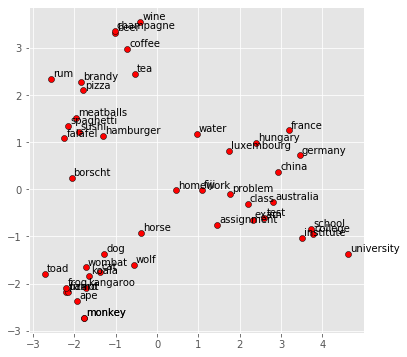

In [25]:
display_pca_scatterplot(word_vectors, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

## SpaCy

SpaCy is a very powerful NLP library that can be used for many of the functions that the NLTK package provides (NLTK is still often used for its list of stopwords), plus word embedding models, and MORE!  If you are interested in NLP, I SERIOUSLY recommend you check out what SpaCy can do.

* Available SpaCy libraries: https://spacy.io/usage/models
* Documentation: https://spacy.io/usage/processing-pipelines



In [26]:
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

In [27]:
raw = pd.read_csv("resources/nlp_classification.csv")
raw.head()

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1


In [28]:
raw.shape

(1000, 2)

### SpaCy Objects

The first step in unlocking the power of SpaCy is to convert your documents into SpaCy objects.  This is done by downloading a model, such as en_core_web_sm (english, core, trained on the web, small version) and using it to predict on each of your documents, which transforms them into SpaCy objects.

In [29]:
### This downloads the specific pretrained word embeddings

# !python -m spacy download en_core_web_md

In [30]:
nlp = spacy.load('en_core_web_sm')

# df.progress_apply() applies a function to your dataframe and shows a progress bar

raw['spacy'] = raw.body.progress_apply(lambda x: nlp(x))

100%|██████████| 1000/1000 [00:45<00:00, 21.78it/s]


In [31]:
raw

,body,target,spacy
0,Noting that the resignation of James Mattis as...,1,"(Noting, that, the, resignation, of, James, Ma..."
1,Desperate to unwind after months of nonstop wo...,1,"(Desperate, to, unwind, after, months, of, non..."
2,"Nearly halfway through his presidential term, ...",1,"(Nearly, halfway, through, his, presidential, ..."
3,Attempting to make amends for gross abuses of ...,1,"(Attempting, to, make, amends, for, gross, abu..."
4,Decrying the Senate’s resolution blaming the c...,1,"(Decrying, the, Senate, ’s, resolution, blamin..."
...,...,...,...
995,Britain’s opposition leader Jeremy Corbyn wou...,0,"( , Britain, ’s, opposition, leader, Jeremy, C..."
996,Turkey will take over the fight against Islam...,0,"( , Turkey, will, take, over, the, fight, agai..."
997,Malaysia is seeking $7.5 billion in reparatio...,0,"( , Malaysia, is, seeking, $, 7.5, billion, in..."
998,An Israeli court sentenced a Palestinian to 1...,0,"( , An, Israeli, court, sentenced, a, Palestin..."


## SpaCy Vectors

In [32]:
# now each element under "spacy" is its own object!
first_spacy = raw.spacy[0]
print(type(first_spacy))
print(type(first_spacy[0]))

<class 'spacy.tokens.doc.Doc'>
<class 'spacy.tokens.token.Token'>


* https://spacy.io/api/token
* https://spacy.io/api/doc

In [33]:
print(len(first_spacy.vector))
first_spacy.vector

96


array([ 1.6260970e-01,  1.0334349e-01,  2.9909867e-01, -9.7197503e-01,
        7.3207265e-01, -5.0996923e-01,  1.0114523e-01,  7.1444815e-01,
       -6.4569044e-01,  6.5640354e-01,  1.3537306e-01, -3.4364066e-01,
       -2.3927559e-01,  6.7473406e-01, -1.0540473e-01,  4.9767223e-01,
       -1.4619307e-01, -5.1615936e-01, -3.1255862e-01, -8.5628942e-02,
       -2.4530934e-01,  1.9635478e-01,  7.3092222e-01, -4.1126814e-01,
        4.5965782e-01,  8.2148516e-01, -9.6020794e-01, -5.5913013e-01,
       -8.4613842e-01, -5.3742015e-01, -1.1820293e-01, -8.8737220e-01,
        2.1659586e-01, -2.4795189e-01, -5.0407171e-01, -1.3227600e-01,
       -1.0810176e-01, -2.6308924e-01, -1.7433053e-01, -3.3103174e-01,
        8.3230454e-01,  1.9720687e-01,  2.1193872e-01, -4.6393400e-01,
        8.9483273e-01, -5.6130987e-01,  1.4012074e-01,  1.1312900e+00,
        2.8236607e-01, -2.8315774e-04, -1.0196264e+00, -6.3881141e-01,
       -3.2794088e-01, -3.2983121e-01, -6.0762703e-02,  9.2838395e-01,
      

In [34]:
print(len(first_spacy[0].vector))
first_spacy[0].vector

96


array([-1.4928656 , -0.6473961 , -1.2095108 , -3.7084475 , -1.0978417 ,
        1.0600296 , -0.42657214,  2.0709891 , -3.4650965 ,  1.5446392 ,
        1.3754879 ,  1.7738248 ,  3.0607321 , -1.9549302 ,  6.0142603 ,
       -2.7217393 ,  1.0380406 ,  0.07308735, -0.9854492 ,  0.58206594,
       -2.2437863 ,  2.7803597 , -1.1217307 , -0.9747269 , -0.73765707,
        4.3289404 ,  2.8031175 , -3.8661175 ,  0.40567228, -3.2012289 ,
        2.5086    ,  0.3704272 , -0.29187638, -0.11960047, -2.540725  ,
        2.1738853 , -1.304627  , -3.7970433 , -0.6872262 ,  0.02312398,
        2.3631055 ,  2.1007502 , -1.7993017 , -0.07034272, -1.7498786 ,
       -1.1512122 , -0.6168709 ,  2.456307  ,  0.54799014, -0.5677793 ,
       -1.7893517 ,  2.6054833 , -1.384892  ,  0.09215224, -2.3154066 ,
        4.144608  , -1.549907  ,  0.30327392, -1.2823845 ,  6.0724688 ,
        2.9434605 , -0.5927964 ,  1.6072723 , -1.7846261 , -4.49065   ,
        5.311668  , -0.3694103 ,  2.4220924 ,  3.121514  , -0.30

## Spacy Parts of Speech (pos)

In [35]:
[w.pos_ for w in first_spacy]

['VERB',
 'SCONJ',
 'DET',
 'NOUN',
 'ADP',
 'PROPN',
 'PROPN',
 'SCONJ',
 'PROPN',
 'ADP',
 'PROPN',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'DET',
 'ADJ',
 'ADJ',
 'NOUN',
 'NOUN',
 'ADP',
 'ADJ',
 'SCONJ',
 'NUM',
 'NOUN',
 'PUNCT',
 'DET',
 'ADJ',
 'NOUN',
 'VERB',
 'NOUN',
 'PROPN',
 'SCONJ',
 'PRON',
 'AUX',
 'ADJ',
 'ADV',
 'ADJ',
 'ADJ',
 'ADJ',
 'NOUN',
 'PRON',
 'VERB',
 'ADV',
 'VERB',
 'PUNCT',
 'PUNCT',
 'PROPN',
 'PUNCT',
 'PRON',
 'VERB',
 'PART',
 'ADV',
 'VERB',
 'ADV',
 'DET',
 'NOUN',
 'DET',
 'ADP',
 'ADV',
 'PUNCT',
 'PRON',
 'VERB',
 'NOUN',
 'PART',
 'VERB',
 'NUM',
 'ADP',
 'PRON',
 'VERB',
 'DET',
 'ADJ',
 'PUNCT',
 'PUNCT',
 'VERB',
 'NUM',
 'PUNCT',
 'ADJ',
 'PROPN',
 'PROPN',
 'ADP',
 'PROPN',
 'PUNCT',
 'PROPN',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'NUM',
 'NUM',
 'PROPN',
 'ADP',
 'ADV',
 'VERB',
 'SCONJ',
 'DET',
 'NOUN',
 'AUX',
 'ADV',
 'ADV',
 'ADV',
 'VERB',
 'PART',
 'VERB',
 'ADJ',
 'ADJ',
 'NOUN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PUNCT',
 'PUNCT',
 'DET',
 

In [36]:
df = pd.DataFrame(np.vstack([x.vector for x in raw.spacy]))

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.162610,0.103343,0.299099,-0.971975,0.732073,-0.509969,0.101145,0.714448,-0.645690,0.656404,...,0.740270,0.430556,0.304848,0.462507,-0.010479,-0.427214,-0.352482,0.265146,0.223663,-0.295547
1,0.043319,0.240038,0.159788,-0.928172,0.763031,-0.459116,0.017325,0.824836,-0.972766,0.734780,...,0.659157,0.507961,0.291544,0.432891,0.111407,-0.452918,-0.197368,0.202922,0.008963,-0.362876
2,-0.025235,0.067365,0.449903,-0.834091,0.984758,-0.529184,-0.155330,0.561772,-0.762955,0.549448,...,1.091827,0.300797,0.825460,0.361413,-0.108769,-0.637978,-1.036487,0.445516,0.366630,-0.287424
3,0.063996,0.237884,0.106443,-0.678201,0.869866,-0.593836,0.183990,0.804364,-1.013909,0.830028,...,0.839361,0.572175,0.346506,0.318644,-0.078164,-0.584696,-0.614820,0.345280,0.186618,-0.274944
4,0.377851,0.344500,0.315184,-0.981601,1.008877,-0.752863,-0.134847,0.527805,-1.147217,0.698617,...,0.387581,0.408883,0.589317,0.507236,-0.059352,-0.284450,-0.605754,0.694380,0.228896,-0.000104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.234737,0.111568,0.130990,-0.691404,0.683634,-0.475506,0.350864,0.650697,-0.918691,0.649378,...,0.509863,0.451129,0.366977,0.528124,-0.260448,-0.305578,-0.446201,0.577708,0.288536,-0.267049
996,0.147711,0.115968,0.028343,-0.612618,1.116275,-0.359004,0.006352,0.715261,-0.918758,0.650946,...,0.507930,0.327576,0.874481,0.579923,-0.335842,-0.322063,-0.545183,0.744144,0.434119,-0.436746
997,0.143746,-0.006893,-0.130741,-0.725969,0.932147,-0.497679,0.048026,0.616822,-0.906932,0.665998,...,0.602324,0.374125,0.961658,0.724891,-0.224507,-0.171980,-0.406178,0.865124,0.844932,-0.432730
998,0.101953,0.066426,-0.044094,-0.836941,0.876101,-0.566333,0.331183,0.840504,-0.989567,0.792358,...,0.299822,0.486346,0.511946,0.569350,-0.420014,-0.143820,-0.132226,0.559939,0.343694,-0.516448


# Topic Modeling

If you want a more comprehensive guide and explanation of topic modeling, I'll refer you to [this article](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/) by Selva Prabhakaran.

In [38]:
import gensim

from nltk.corpus import stopwords
import gensim.corpora as corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

### Functionalize

It's always a good idea to functionalize your text processing pipeline so you can reuse it easily.

In [39]:
def process_words(texts, stop_words=stopwords.words("english"), allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    #use embedded list constructors to iterate over each word in the corpus
    texts = [[word for word in doc.split() if word not in stop_words] for doc in texts]
    texts_out = []
    
    #load your SpaCy model
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        #SpaCy allows you to use the parts of speech of each word to guide lemmatization.
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in doc if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(raw.body) 

In [40]:
data_ready

[['note',
  'resignation',
  'mark',
  'ouster',
  'third',
  'top',
  'administration',
  'official',
  'less',
  'week',
  'worried',
  'populace',
  'tell',
  'reporter',
  'unsure',
  'many',
  'former',
  'trump',
  'staffer',
  'could',
  'safely',
  'reabsorb',
  'take',
  'back',
  'asshole',
  'need',
  'time',
  'process',
  'get',
  'next',
  'say',
  'old',
  'echo',
  'concern',
  'also',
  'note',
  'country',
  'truly',
  'begin',
  'reintegrate',
  'former',
  'national',
  'security',
  'advisor',
  'sustainable',
  '’d',
  'say',
  'handle',
  'maybe',
  'former',
  'member',
  'inner',
  'circle',
  'remainder',
  'year',
  '’',
  'country',
  'limit',
  'populace',
  'confirm',
  'could',
  'handle',
  'piece',
  'shit',
  'try',
  'rejoin',
  'society'],
 ['desperate',
  'unwind',
  'month',
  'nonstop',
  'work',
  'investigate',
  'russian',
  'influence',
  'election',
  'visibly',
  'exhausted',
  'power',
  'phone',
  'order',
  'give',
  'break',
  'news',
  

In [41]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [42]:
print(lda_model.print_topics())

[(0, '0.024*"year" + 0.015*"country" + 0.012*"also" + 0.012*"percent" + 0.012*"include" + 0.009*"state" + 0.006*"many" + 0.005*"world" + 0.005*"deal" + 0.005*"part"'), (1, '0.054*"say" + 0.012*"government" + 0.009*"would" + 0.008*"official" + 0.007*"election" + 0.007*"last" + 0.006*"call" + 0.006*"tell" + 0.006*"force" + 0.005*"security"'), (2, '0.024*"people" + 0.020*"police" + 0.018*"kill" + 0.011*"migrant" + 0.010*"protest" + 0.009*"city" + 0.009*"woman" + 0.008*"violence" + 0.008*"attack" + 0.008*"man"'), (3, '0.012*"communication" + 0.010*"experience" + 0.008*"popular" + 0.008*"outbreak" + 0.008*"fee" + 0.007*"essential" + 0.006*"ceremony" + 0.006*"promote" + 0.005*"personal" + 0.005*"online"')]


In [43]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.307711 -0.087799       1        1  43.923023
0      0.015433  0.291973       2        1  35.984905
2      0.176465 -0.129865       3        1  13.230133
3      0.115813 -0.074309       4        1   6.861944, topic_info=          Term         Freq        Total Category  logprob  loglift
39         say  4454.000000  4454.000000  Default  30.0000  30.0000
56        year  1510.000000  1510.000000  Default  29.0000  29.0000
598     people  1047.000000  1047.000000  Default  28.0000  28.0000
10     country   954.000000   954.000000  Default  27.0000  27.0000
2954    police   467.000000   467.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2019   website    51.521812    99.213425   Topic4  -5.4454   2.0239
1993      race    39.649887    64.511536   Topic4  -5.7073   2.1924
1078   company    55.571087   162.272003   Topic4  -5.3697   1.6076
12936     1MDB    38.535709    68.621529   Topic4  -5.7358   2.1022
129        use    43.464630   373.372559   Topic4  -5.6154   0.5286

[214 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1163       1  0.913722      -
1163       3  0.084020      -
12936      1  0.145727   1MDB
12936      2  0.262308   1MDB
12936      3  0.029145   1MDB
...      ...       ...    ...
225        2  0.158996  would
4044       3  0.974460  wound
56         2  0.999442   year
57         2  0.987636      ’
57         4  0.009187      ’

[269 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])